In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path gambar nanas
image_path = 'buah.jpg'

# Baca gambar dan konversi ke RGB
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [3]:
# Tentukan rentang warna untuk daun dalam RGB
lower_green = np.array([0, 100, 0], dtype=np.uint8)  # Lower bound untuk warna hijau dalam RGB
upper_green = np.array([80, 255, 80], dtype=np.uint8)  # Upper bound untuk warna hijau dalam RGB

In [4]:
# Tentukan rentang warna untuk buah dalam RGB
lower_yellow = np.array([150, 120, 0], dtype=np.uint8)  # Lower bound untuk warna kuning dalam RGB
upper_yellow = np.array([255, 255, 80], dtype=np.uint8)  # Upper bound untuk warna kuning dalam RGB

In [5]:
# Buat maska untuk daun (hijau)
mask_daun = cv2.inRange(original_image, lower_green, upper_green)

# Buat maska untuk buah (kuning)
mask_buah = cv2.inRange(original_image, lower_yellow, upper_yellow)

In [6]:
# Bersihkan maska menggunakan operasi morfologi
kernel = np.ones((5, 5), np.uint8)
mask_daun = cv2.morphologyEx(mask_daun, cv2.MORPH_OPEN, kernel)
mask_buah = cv2.morphologyEx(mask_buah, cv2.MORPH_OPEN, kernel)

# Dapatkan kontur dari maska daun dan buah
contours_daun, _ = cv2.findContours(mask_daun, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_buah, _ = cv2.findContours(mask_buah, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
# Buat maska kosong untuk segmentasi daun dan buah
mask_segmented_daun = np.zeros_like(original_image)
mask_segmented_buah = np.zeros_like(original_image)

In [8]:
# Gambar kontur daun ke dalam maska segmentasi daun
cv2.drawContours(mask_segmented_daun, contours_daun, -1, 255, thickness=cv2.FILLED)

# Gambar kontur buah ke dalam maska segmentasi buah
cv2.drawContours(mask_segmented_buah, contours_buah, -1, (255, 255, 255), thickness=cv2.FILLED)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

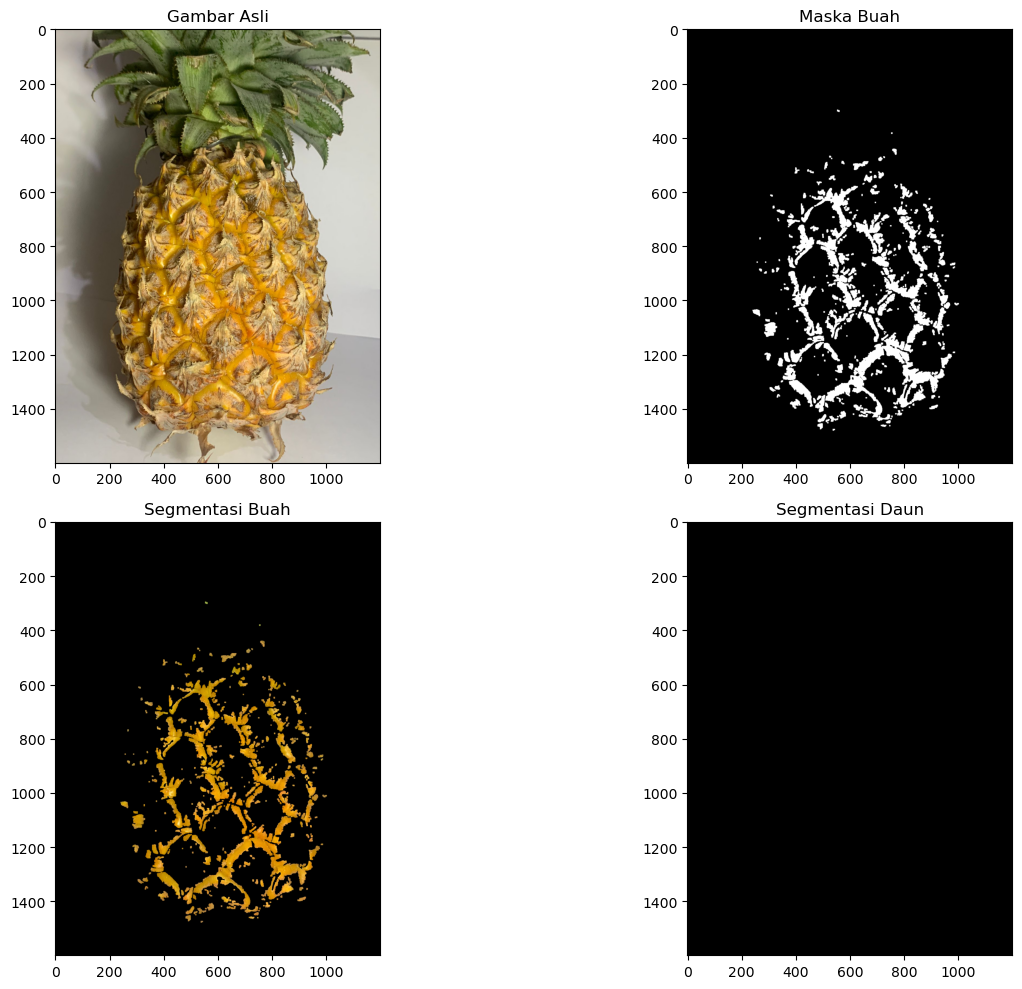

In [9]:
# Segmentasi gambar menggunakan maska daun dan buah
segmented_daun = cv2.bitwise_and(original_image, mask_segmented_daun)
segmented_buah = cv2.bitwise_and(original_image, mask_segmented_buah)

# Tampilkan hasil menggunakan matplotlib dalam satu output
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].imshow(original_image)
axs[0, 0].set_title('Gambar Asli')

axs[0, 1].imshow(mask_buah, cmap='gray')
axs[0, 1].set_title('Maska Buah')

axs[1, 0].imshow(segmented_buah)
axs[1, 0].set_title('Segmentasi Buah')

axs[1, 1].imshow(segmented_daun)
axs[1, 1].set_title('Segmentasi Daun')

plt.tight_layout()
plt.show()